In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


# Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/corona-virus-report/country_wise_latest.csv")
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


# Perbandingan COVID-19 di Seluruh Dunia

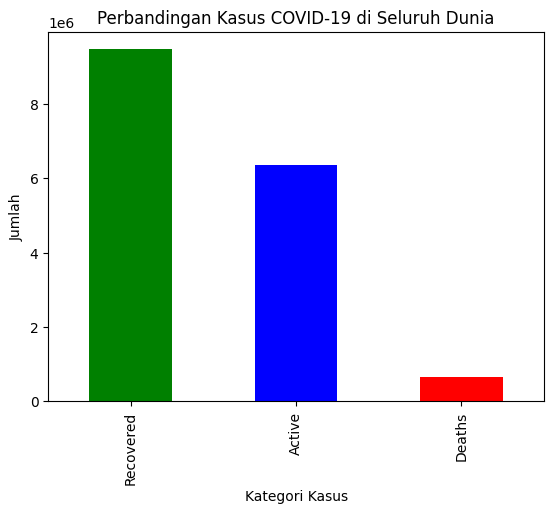

In [11]:
sums = df[column_names].sum() # Sum semua nama kolom
sorted_sums = sums.sort_values(ascending=False) # Kemudian sorting
colors = ['red' if x == 'Deaths' else 'green' if x == 'Recovered' else 'blue' for x in sorted_sums.index] # Cond state untuk warna
sorted_sums.plot(kind="bar", color=colors, title='Perbandingan Kasus COVID-19 di Seluruh Dunia') # Bar plot
plt.xlabel("Kategori Kasus") # X label
plt.ylabel("Jumlah") # y label
plt.show()

In [12]:
sorted_sums

Recovered    9468087
Active       6358362
Deaths        654036
dtype: int64

Dapat dilihat bahwa jumlah pasien di seluruh dunia yang statusnya 'recovered' / sembuh berjumlah 9.468.087 orang. Sedangkan untuk pasien yang masih aktif berjumlah 6.358.362 orang, dan kasus kematian sendiri cukup rendah yaitu berjumlah 654.036 orang.

# Perbandingan Kasus Kematian di 10 Negara Terbanyak

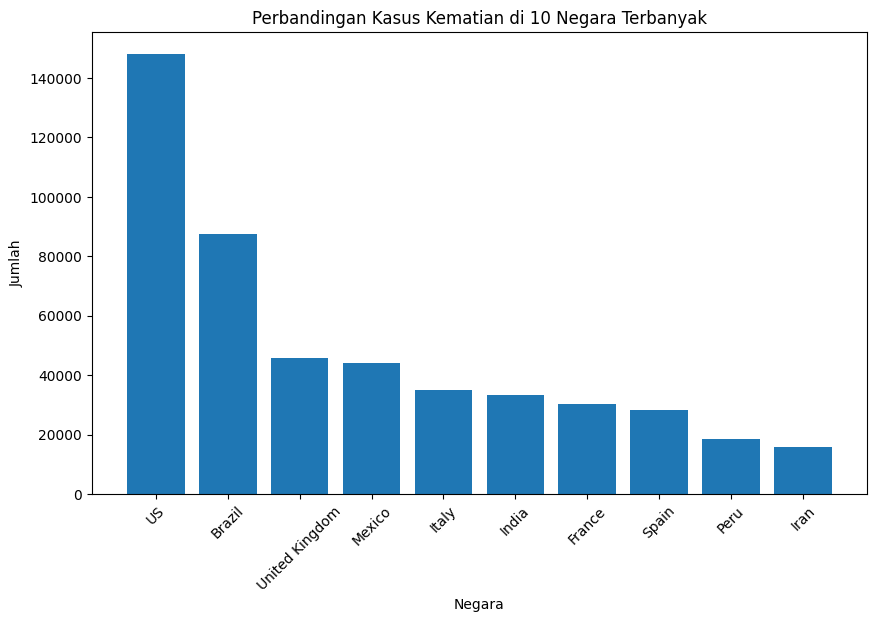

In [25]:
country_deaths = df[['Country/Region', 'Deaths']] # Ambil 2 kolom yaitu country dan deaths sbg bahan perbandingan
country_deaths = country_deaths.sort_values(by='Deaths', ascending = False) # Sorting
plt.figure(figsize=(10, 6))
plt.bar(country_deaths['Country/Region'].head(10), country_deaths['Deaths'].head(10)) # Ambil 10 country
plt.title('Perbandingan Kasus Kematian di 10 Negara Terbanyak')
plt.xticks(rotation = 45) # Rotasi X ticks agar tidak overlap
plt.xlabel("Negara") # X label
plt.ylabel("Jumlah") # y label
plt.show()

Jika dilihat dari hasil visualisasi data, kasus kematian terbanyak terdapat di US diikuti dengan negara-negara lainnya secara berurutan yaitu Brazil, UK, Mexico, Italy, India, Prancis, Spanyol, Peru, dan Iran.

# Perbandingan Kasus Kematian dan Pasien Aktif COVID-19 di 3 Negara Asia Tenggara

In [26]:
country_wise = pd.read_csv('/kaggle/input/corona-virus-report/country_wise_latest.csv')
country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


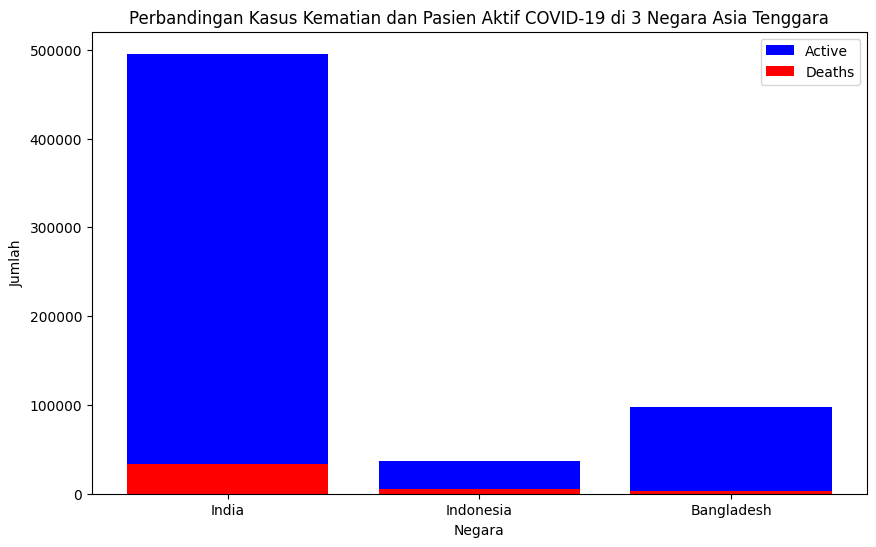

In [42]:
df_sea = df[df['WHO Region'] == 'South-East Asia'] # Filter data untuk Negara Asia Tenggara
sorted_df_sea = df_sea.sort_values(by="Deaths", ascending=False)[:3] # Ambil 3 negara dg kematian terbanyak
plt.figure(figsize=(10, 6))
plt.bar(sorted_df_sea["Country/Region"], sorted_df_sea["Active"], label='Active', color='blue')  # Plot kasus aktif
plt.bar(sorted_df_sea["Country/Region"], sorted_df_sea["Deaths"], label='Deaths', color='red')  # Plot kasus kematian
plt.legend()
plt.xlabel('Negara')  # Label sumbu X
plt.ylabel('Jumlah')  # Label sumbu Y
plt.title('Perbandingan Kasus Kematian dan Pasien Aktif COVID-19 di 3 Negara Asia Tenggara')
plt.show()

In [43]:
sorted_df_sea

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
80,Indonesia,100303,4838,58173,37292,1525,57,1518,4.82,58.00,8.32,88214,12089,13.70,South-East Asia
13,Bangladesh,226225,2965,125683,97577,2772,37,1801,1.31,55.56,2.36,207453,18772,9.05,South-East Asia


Setelah mengambil 3 kasus kematian terbanyak di seluruh Region Asia Tenggara, dapat dilihat bahwa:
* India memiliki kasus kematian terbanyak yaitu 3.3408 diikuti dengan pasien aktif COVID-19 sebanyak 495.499
* Indonesia memiliki kasus kematian terbanyak yaitu 4.838 diikuti dengan pasien aktif COVID-19 sebanyak 37.292
* Bangladesh memiliki kasus kematian terbanyak yaitu 2.965 diikuti dengan pasien aktif COVID-19 sebanyak 97.577

In [45]:
worldometer = pd.read_csv('/kaggle/input/corona-virus-report/worldometer_data.csv')
worldometer.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [52]:
worldometer.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [53]:
worldometer['Serious,Critical']

0      18296.0
1       8318.0
2       8944.0
3       2300.0
4        539.0
        ...   
204        NaN
205        NaN
206        NaN
207        NaN
208        NaN
Name: Serious,Critical, Length: 209, dtype: float64

# Perbandingan Pasien COVID-19 Kritis vs. Non-Kritis di Indonesia

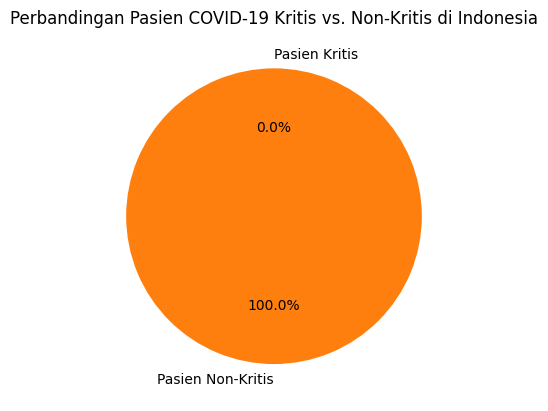

In [62]:
df_indonesia = worldometer[worldometer['Country/Region'] == 'Indonesia'] # Filter Data Indonesia
if not df_indonesia.empty: # Cek DF jgn sampai kosong
    serious_critical_cases = df_indonesia['Serious,Critical'].sum() # Pasien kritis
    active_non_critical_cases = df_indonesia['ActiveCases'].sum() - serious_critical_cases # Pasien !kritis
    data = [serious_critical_cases, active_non_critical_cases]
    labels = ['Pasien Kritis', 'Pasien Non-Kritis']
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Perbandingan Pasien COVID-19 Kritis vs. Non-Kritis di Indonesia')
    plt.show()
else:
    print("Tidak ada data.")

Berdasarkan hasil visualisasi, dapat dilihat bahwa tidak ada pasien kritis di Indonesia.

# Perbandingan Pasien COVID-19 Kritis vs. Non-Kritis di Seluruh Dunia

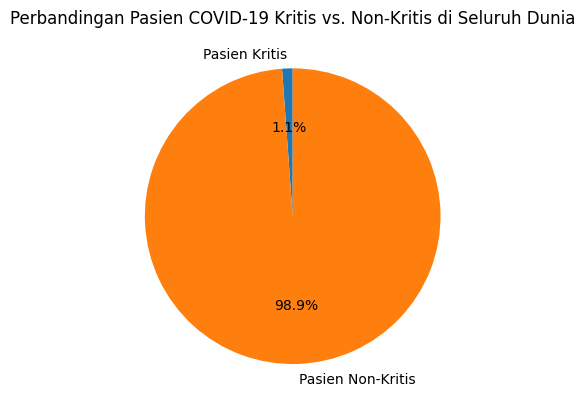

In [65]:
if not worldometer.empty: # Cek DF jgn sampai kosong
    serious_critical_cases = worldometer['Serious,Critical'].sum() # Pasien kritis
    active_non_critical_cases = worldometer['ActiveCases'].sum() - serious_critical_cases # Pasien !kritis
    data = [serious_critical_cases, active_non_critical_cases]
    labels = ['Pasien Kritis', 'Pasien Non-Kritis']
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Perbandingan Pasien COVID-19 Kritis vs. Non-Kritis di Seluruh Dunia')
    plt.show()
else:
    print("Tidak ada data.")

Kemudian, setelah mengetahui bahwa tidak ada pasien kritis di Indonesia. Maka, kita perlu mengecek persentase pasien kritis di seluruh dunia. Hal menarik di sini adalah hanya 1.1% pasien aktif COVID-19 yang berstatus kritis atau memerlukan penanganan khusus.

# Negara/Region dengan Pasien Kritis Terbanyak

In [70]:
if not worldometer.empty: # Cek DF jgn sampai kosong
    sorted_by_critical = worldometer.sort_values(by='Serious,Critical', ascending=False) # Sorting
    # Ambil 10 negara/region teratas dengan pasien kritis terbanyak
    top_critical_countries = sorted_by_critical[['Country/Region', 'Serious,Critical']].head(10)
    print("Negara/Region dengan Pasien Kritis Terbanyak:")
    print(top_critical_countries)
else:
    print("Tidak ada data.")

Negara/Region dengan Pasien Kritis Terbanyak:
   Country/Region  Serious,Critical
0             USA           18296.0
2           India            8944.0
1          Brazil            8318.0
10           Iran            4156.0
5          Mexico            3987.0
3          Russia            2300.0
23         Canada            2263.0
12   Saudi Arabia            1915.0
8        Colombia            1493.0
6            Peru            1426.0


Mari kita cek, negara mana yang memiliki pasien kritis, diketahui bahwa negara yang memiliki pasien kritis terbanyak adalah sebagai berikut:
1. USA
2. India
3. Brazil
4. Iran
5. Mexico
6. Russia
7. Canada
8. Arab Saudi
9. Colombia
10. Peru

# Kesimpulan

Walaupun secara keseluruhan rekap data diketahui bahwa tidak banyak pasien kritis maupun pasien yang pada akhirnya meninggal dikarenakan COVID-19. Namun, perlu diperhatikan bahwa pada saat data ini direkap banyak pasien yang masih terjangkit / aktif mengidap COVID-19. Khususnya di Negara USA, hal ini perlu ditinjau lebih jauh lagi, apakah memang secara persentase Negara USA memiliki pasien aktif lebih tinggi dibandingkan dengan negara lain, atau hanya dikarenakan jumlah populasi / sampel yang digunakan di dalam dataset lebih banyak berlokasi di USA. Hal lain yang perlu diperhatikan adalah di Wilayah Asia Tenggara sendiri, Negara Indonesia memiliki pasien yang meninggal akibat COVID-19 kedua tertinggi setelah India.